### Dataset loading

In [1]:
import numpy as np

X_train = np.load("x_train.npy", allow_pickle=1)
np.random.shuffle(X_train)
Y_train = np.load("y_train.npy", allow_pickle=1)
np.random.shuffle(Y_train)
X_test = np.load("x_test.npy", allow_pickle=1)
np.random.shuffle(X_test)
Y_test = np.load("y_test.npy", allow_pickle=1)
np.random.shuffle(Y_test)

In [2]:
print(f"""
TRAIN:
X: {X_train.shape}, Y: {Y_train.shape}
TEST:
X: {X_test.shape}, Y: {Y_test.shape}
""")


TRAIN:
X: (13721052, 5, 5, 5), Y: (13721052, 5, 5, 5)
TEST:
X: (12199994, 5, 5, 5), Y: (12199994, 5, 5, 5)



In [3]:
import tensorflow as tf
y_mid =Y_train[:, 2,2,2][::10]
x=X_train.reshape(-1, 5, 5, 5,1)[::10]

y_mid_t =Y_test[:, 2,2,2]
x_t = X_test.reshape(-1, 5, 5, 5,1)

In [4]:
def batch_generator(X, Y, batch_size = 64):
    indices = np.arange(len(X)) 
    batch=[]
    while True:
            # it might be a good idea to shuffle your data before each epoch
            np.random.shuffle(indices) 
            for i in indices:
                batch.append(i)
                if len(batch)==batch_size:
                    yield X[batch], Y[batch]
                    batch=[]
                    
train_generator = batch_generator(x, y_mid, batch_size = 64)
val_generator = batch_generator(x_t, y_mid_t, batch_size = 64)

In [ ]:
import keras
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Reshape, Conv3D, Flatten, MaxPool3D, BatchNormalization
import tensorflow as tf
import keras.backend as K
# tf.compat.v1.disable_eager_execution() 

N = 1024*1024
try: 
    strategy
except:
    strategy = tf.distribute.MirroredStrategy(["GPU:1","GPU:0"])
    print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

# try:
#     model
# except:
#     # Open a strategy scope.
#     with strategy.scope():
#       # Everything that creates variables should be under the strategy scope.
#       # In general this is only model construction & `compile()`.

model = Sequential()
model.add(Conv3D(10, kernel_size=(2,2,2), strides=(1,1,1),input_shape=(5,5,5,1), padding='same', activation='sigmoid'))
model.add(MaxPool3D(pool_size=(2,2,2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam')
    

train_arr = [] 
test_arr = []
    # Train the model on all available devices.
hist = model.fit_generator(train_generator, validation_data=val_generator)

hist = hist.history
loss = hist['loss']

 427324/Unknown - 2568s 6ms/step - loss: 0.0177

In [18]:
i = 0
N = 1024*1024

val_x = x_t[i:i+N]
val_y = y_mid_t[i:i+N]
val = model.evaluate(val_x, val_y)


32768/32768 [==============================] - 46s 1ms/step - loss: 0.0146


In [ ]:
! jupyter notebook stop

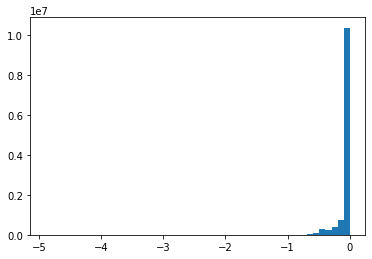

IndexError: too many indices for array: array is 1-dimensional, but 4 were indexed

In [16]:
plt.hist(y_mid_t.reshape(-1), bins=50)
plt.show()
pred = model.predict(x_t.reshape(-1,5,5,5,1, y_mid_t))
plt.hist(pred.reshape(-1), bins=50)
plt.show()

In [18]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices()) # list of DeviceAttributes

tf.__version__

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16122061786637476915
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8658159843921049879
physical_device_desc: "device: XLA_CPU device"
]


'1.14.0'